In [ ]:
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/weather.csv',error_bad_lines=False, index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
!pip install AutoML

     |████████████████████████████████| 71 kB 84 kB/s 
     |████████████████████████████████| 627 kB 45.9 MB/s 
     |████████████████████████████████| 22.3 MB 112.5 MB/s 
     |████████████████████████████████| 150 kB 76.6 MB/s 
     |████████████████████████████████| 81 kB 9.5 MB/s 
     |████████████████████████████████| 10.4 MB 30.0 MB/s 
     |████████████████████████████████| 2.9 MB 38.0 MB/s 
     |████████████████████████████████| 65 kB 1.7 MB/s 
     |████████████████████████████████| 81 kB 4.6 MB/s 
     |████████████████████████████████| 219 kB 46.1 MB/s 
     |████████████████████████████████| 162 kB 41.0 MB/s 
     |████████████████████████████████| 162 kB 49.4 MB/s 
     |████████████████████████████████| 162 kB 43.8 MB/s 
     |████████████████████████████████| 3.3 MB 34.6 MB/s 
     |████████████████████████████████| 112 kB 41.8 MB/s 
     |████████████████████████████████| 108 kB 45.8 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████

In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.4 MB 21.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 1.1 MB 34.7 MB/s 
     |████████████████████████████████| 837 kB 45.0 MB/s 
     |████████████████████████████████| 11.3 MB 63.0 MB/s 
     |████████████████████████████████| 4.3 MB 41.9 MB/s 
     |████████████████████████████████| 4.0 MB 39.6 MB/s 
     |████████████████████████████████| 260 kB 51.5 MB/s 
     |████████████████████████████████| 596 kB 50.7 MB/s 
     |████████████████████████████████| 133 kB 56.5 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.6-py3-none-any.whl size=6602835 sha256=e1fba89c0704075f07fa75a592f989f6c3b424d4fd7558ac494295adfbb0b267
  Stored in directory: /root/.cache/pip/wheels/6a/70/48/db9c00457f87a751083ca0d5c99bf34387dde818c705bd9800
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=2c7

In [ ]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
#from tensorflow.keras.utils import np_utils, to_categorical
#utils.to_categorical
from tensorflow.keras import utils
from keras.callbacks import ModelCheckpoint

In [ ]:
df=df.drop('Unnamed: 58',axis=1)
df=df.drop('GAMEHOST',axis=1)

In [ ]:
pd.to_datetime(df['TIMESTAMP'], unit='ms')

0         1970-01-20 00:12:41.520
1         1970-01-20 00:12:41.520
2         1970-01-20 00:12:41.520
3         1970-01-20 00:12:41.520
4         1970-01-20 00:12:41.520
                    ...          
3572323   1970-01-20 00:11:28.491
3572324   1970-01-20 00:11:28.491
3572325   1970-01-20 00:11:28.491
3572326   1970-01-20 00:11:28.491
3572327   1970-01-20 00:11:28.491
Name: TIMESTAMP, Length: 3572328, dtype: datetime64[ns]

In [ ]:
# Assigning X and Y 
X=df.iloc[:,df.columns!='M_WEATHER']
y=df.iloc[:,df.columns=='M_WEATHER']
X=df.iloc[:,df.columns!='TIMESTAMP']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (2857862, 56)
Shape of x_valid:  (714466, 56)
Shape of y_train:  (2857862, 1)
Shape of y_valid:  (714466, 1)


In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1], )))

model.add(Dense(32, activation='relu'))

model.add(Dense(8, activation='relu')) 
model.add(Dense(4, activation='relu')) 
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1824      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 3,199
Trainable params: 3,199
Non-trainabl

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(X_train, y_train, batch_size=256, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
11164/11164 [==============================] - 40s 3ms/step - loss: nan - acc: 0.7459 - val_loss: nan - val_acc: 0.7456
Epoch 2/7
11164/11164 [==============================] - 39s 3ms/step - loss: nan - acc: 0.7459 - val_loss: nan - val_acc: 0.7456
Epoch 3/7
11164/11164 [==============================] - 40s 4ms/step - loss: nan - acc: 0.7459 - val_loss: nan - val_acc: 0.7456
Epoch 4/7
11164/11164 [==============================] - 39s 3ms/step - loss: nan - acc: 0.7459 - val_loss: nan - val_acc: 0.7456
Epoch 5/7
11164/11164 [==============================] - 37s 3ms/step - loss: nan - acc: 0.7459 - val_loss: nan - val_acc: 0.7456
Epoch 6/7
11164/11164 [==============================] - 37s 3ms/step - loss: nan - acc: 0.7459 - val_loss: nan - val_acc: 0.7456
Epoch 7/7
11164/11164 [==============================] - 36s 3ms/step - loss: nan - acc: 0.7459 - val_loss: nan - val_acc: 0.7456


In [ ]:
import matplotlib.pyplot as plt

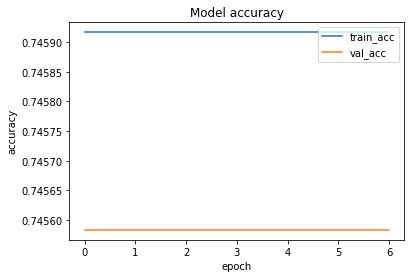

In [ ]:
# plot the training artifacts
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)


In [ ]:
def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Weather is clear")
        elif array[i] == 1:
          print("Weather is light cloud")
        elif array[i]==2:
           print("Weather is Overcast")
        elif array[i]==3:
           print("Light rain")
        elif array[i]==4:
           print("Heavyrain")
        else:
           print("Weather is Overcast")

          

           

In [ ]:
view_result(pred_test[:5])

Weather is Overcast
Weather is Overcast
Weather is Overcast
Weather is Overcast
Weather is Overcast
